**Heart Disease Prediction Using Clinical Patient Data**

Heart disease is one of the leading causes of death worldwide. Early diagnosis is critical, but manual analysis of patient clinical data such as age, cholesterol, blood pressure, ECG results, and exercise-induced symptoms is time-consuming and prone to human error. There is a need for a data-driven system that can analyze multiple medical attributes simultaneously and assist in predicting the presence of heart disease accurately.

The main objective of this task is to analyze patient clinical data and develop a predictive model that can determine whether a patient has heart disease (AHD = Yes/No). Specifically, the objectives are:

To understand and preprocess clinical attributes related to heart disease

To identify key risk factors influencing heart disease

To build a classification model for predicting heart disease

To evaluate the model’s performance using appropriate metrics

**The following tools and technologies are used for this task:**

Python – For data processing and model development

Pandas – For data loading and manipulation

NumPy – For numerical computations

Matplotlib / Seaborn – For data visualization

Scikit-learn – For implementing machine learning algorithms

Jupyter Notebook / Google Colab – For development and experimentation



**Data Collection**

Load the heart disease dataset containing patient clinical attributes.

Data Preprocessing

Handle missing values

Encode categorical variables (ChestPain, Thal, AHD)

Normalize or scale numerical features

Exploratory Data Analysis (EDA)

Analyze distributions of age, cholesterol, and blood pressure

Study correlations between features and heart disease

Model Development

Split data into training and testing sets

Train classification models (e.g., Logistic Regression, Decision Tree, Random Forest)

Model Evaluation

Evaluate model accuracy, precision, recall, and confusion matrix

Conclusion & Reporting

Interpret results

Identify important risk factors

Suggest improvements for future work

In [ ]:
from google.colab import files
files.upload()


Saving Heart.csv to Heart.csv


{'Heart.csv': b'"","Age","Sex","ChestPain","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng","Oldpeak","Slope","Ca","Thal","AHD"\n"1",63,1,"typical",145,233,1,2,150,0,2.3,3,0,"fixed","No"\n"2",67,1,"asymptomatic",160,286,0,2,108,1,1.5,2,3,"normal","Yes"\n"3",67,1,"asymptomatic",120,229,0,2,129,1,2.6,2,2,"reversable","Yes"\n"4",37,1,"nonanginal",130,250,0,0,187,0,3.5,3,0,"normal","No"\n"5",41,0,"nontypical",130,204,0,2,172,0,1.4,1,0,"normal","No"\n"6",56,1,"nontypical",120,236,0,0,178,0,0.8,1,0,"normal","No"\n"7",62,0,"asymptomatic",140,268,0,2,160,0,3.6,3,2,"normal","Yes"\n"8",57,0,"asymptomatic",120,354,0,0,163,1,0.6,1,0,"normal","No"\n"9",63,1,"asymptomatic",130,254,0,2,147,0,1.4,2,1,"reversable","Yes"\n"10",53,1,"asymptomatic",140,203,1,2,155,1,3.1,3,0,"reversable","Yes"\n"11",57,1,"asymptomatic",140,192,0,0,148,0,0.4,2,0,"fixed","No"\n"12",56,0,"nontypical",140,294,0,2,153,0,1.3,2,0,"normal","No"\n"13",56,1,"nonanginal",130,256,1,2,142,1,0.6,2,1,"fixed","Yes"\n"14",44,1,"nontypical",

In [ ]:
import os
os.listdir()


['.config', 'Heart.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [ ]:
df = pd.read_csv("Heart.csv")
df.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
df.describe()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


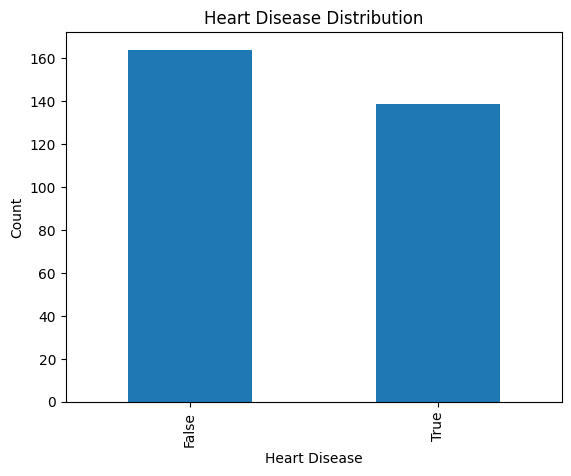

In [ ]:
df['AHD_Yes'].value_counts().plot(kind='bar')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


In [ ]:
X = df.drop('AHD_Yes', axis=1)
y = df['AHD_Yes']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8688524590163934


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[24  5]
 [ 3 29]]


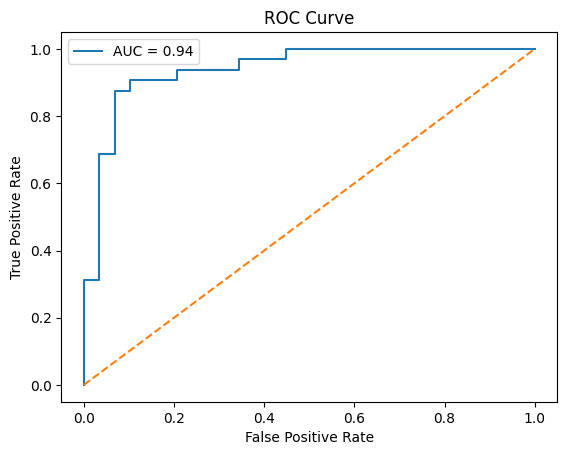

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 2)))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


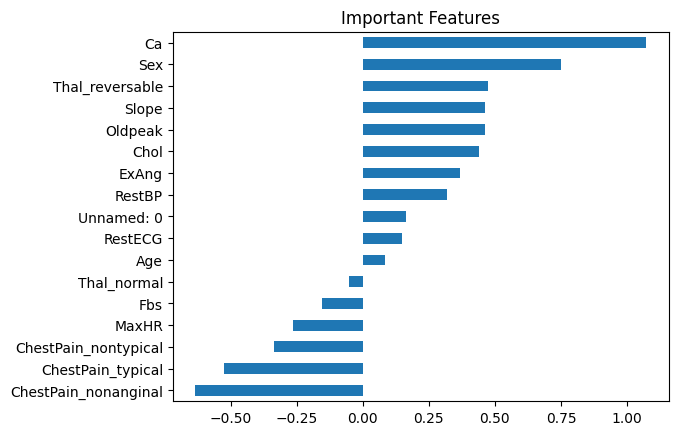

In [ ]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Important Features")
plt.show()
